In [23]:
from skimage.feature import graycomatrix, graycoprops
import numpy as np
from math import radians

# mas info en https://scikit-image.org/docs/0.7.0/api/skimage.feature.texture.html

img= [[0, 0, 1, 0, 1, 2],
    [1, 0, 0, 1, 0, 3],
    [3, 1, 0, 0, 1, 1],
    [2, 2, 2, 1, 3, 0],
    [1, 0, 3, 0, 2, 2],
    [3, 0, 1, 2, 3, 1]]

img = np.array(img, 'uint8')

# algoritmo graycomatrix P01
level = 4  #numero de niveles de la imagen
P_1_0 = graycomatrix(img, distances=[1], angles=[radians(0)], levels=level, symmetric=False, normed=False)
g = P_1_0.reshape(level,level)
print(g)
contrast =  graycoprops(P_1_0, 'contrast')
print(contrast)

# algoritmo graycomatrix P10
l= 4  #numero de niveles de la imagen
P_1_90 = graycomatrix(img, distances=[1], angles=[radians(90)], levels=l, symmetric=False, normed=False)
M = P_1_90.reshape(l,l)
print(M)

[[3 5 1 2]
 [5 1 2 1]
 [0 1 3 1]
 [3 2 0 0]]
[[2.5]]
[[3 5 3 0]
 [5 0 1 3]
 [1 2 0 3]
 [0 2 2 0]]


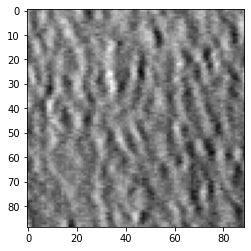

0 11


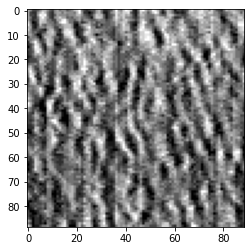

contrast: 5.069841675178754
dissimilarity: 1.7414453524004085
energy: 0.12418239591071684
ASM: 0.015421267454126022
homogeneity: 0.41670577664987907


In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from skimage.feature import graycomatrix, graycoprops
import numpy as np
from math import radians

img = cv2.imread("textura_1.tif",0)

plt.imshow(img, cmap="gray")
plt.show()

new_scale = (0,11)
img2 = preprocessing.MinMaxScaler(new_scale).fit_transform(img).astype("int")

maximo = np.max(img2)
minimo =  np.min(img2)
print(minimo, maximo)

plt.imshow(img2, cmap="gray")
plt.show()

level = 12  #numero de niveles de la imagen
P = graycomatrix(img2, distances=[1], angles=[radians(0)], levels=level, symmetric=False, normed=False)
g = P.reshape(level,level)

lista_descriptores = ["contrast", "dissimilarity", "energy", "ASM", "homogeneity"]

for descriptores in lista_descriptores:
    res = np.squeeze(graycoprops(P,descriptores))
    print(f"{descriptores}: {res}")


['texturas\\textura_1.tif', 'texturas\\textura_2.tif', 'texturas\\textura_3.tif', 'texturas\\textura_4.jpg', 'texturas\\textura_4.tif', 'texturas\\textura_5.tif', 'texturas\\textura_6.tif', 'texturas\\textura_7.tif', 'texturas\\textura_8.tif', 'texturas\\textura_9.tif', 'texturas\\textura_10.jpg']


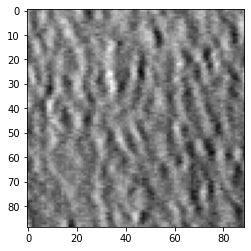

contrast: 5.0698
dissimilarity: 1.7414
energy: 0.1242
ASM: 0.0154
homogeneity: 0.4167


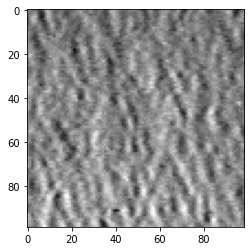

contrast: 4.6415
dissimilarity: 1.6788
energy: 0.1292
ASM: 0.0167
homogeneity: 0.4215


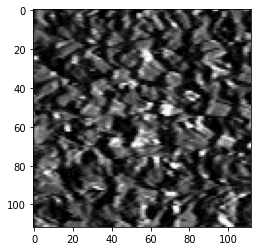

contrast: 3.1840
dissimilarity: 1.2127
energy: 0.2231
ASM: 0.0498
homogeneity: 0.5641


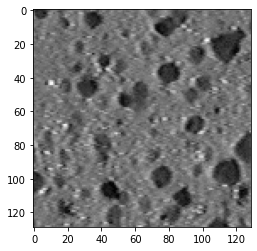

contrast: 2.9234
dissimilarity: 1.2676
energy: 0.1559
ASM: 0.0243
homogeneity: 0.5153


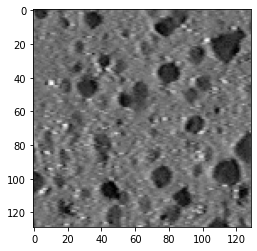

contrast: 2.8229
dissimilarity: 1.2380
energy: 0.1582
ASM: 0.0250
homogeneity: 0.5241


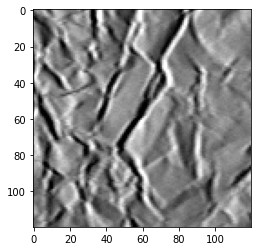

contrast: 3.1650
dissimilarity: 1.2620
energy: 0.1538
ASM: 0.0237
homogeneity: 0.5351


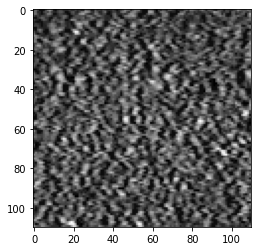

contrast: 5.6937
dissimilarity: 1.8161
energy: 0.1319
ASM: 0.0174
homogeneity: 0.4171


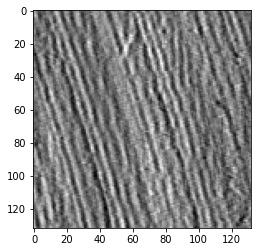

contrast: 6.4271
dissimilarity: 2.0230
energy: 0.1179
ASM: 0.0139
homogeneity: 0.3627


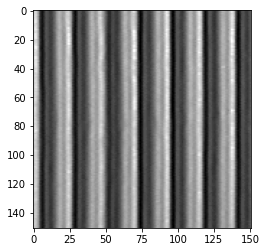

contrast: 6.4233
dissimilarity: 1.9306
energy: 0.1234
ASM: 0.0152
homogeneity: 0.3979


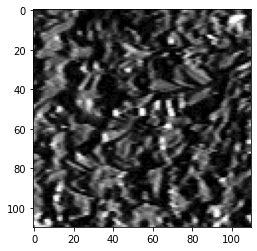

contrast: 3.5875
dissimilarity: 1.2689
energy: 0.2490
ASM: 0.0620
homogeneity: 0.5609


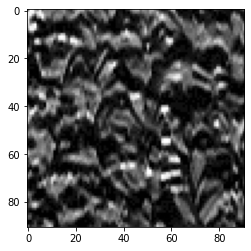

contrast: 4.5915
dissimilarity: 1.4515
energy: 0.2166
ASM: 0.0469
homogeneity: 0.5258


In [54]:
from skimage.io import imread_collection
import cv2
import matplotlib.pyplot as plt

col = imread_collection("texturas/textura_*.*")
print(col.files)

lista_descriptores = ["contrast", "dissimilarity", "energy", "ASM", "homogeneity"]

for filename in col.files:
    image = cv2.imread(filename,0)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image, cmap="gray")
    plt.show()
    new_scale = (0,11)
    img2 = preprocessing.MinMaxScaler(new_scale).fit_transform(image).astype("int")
    level = 12  #numero de niveles de la imagen
    P = graycomatrix(img2, distances=[1], angles=[radians(0)], levels=level, symmetric=False, normed=False)
    for descriptores in lista_descriptores:
        res = np.squeeze(graycoprops(P,descriptores))
        print(f"{descriptores}: {res:3.4f}")